

# Stock Market Prediction using Numerical and Textual Analysis




In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moury\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moury\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Step 1 : Importing the Numerical dataset and performing Exploratory Analysis

In [2]:
# Dataframe for exploratory analysis
df=pd.read_csv('^BSESN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


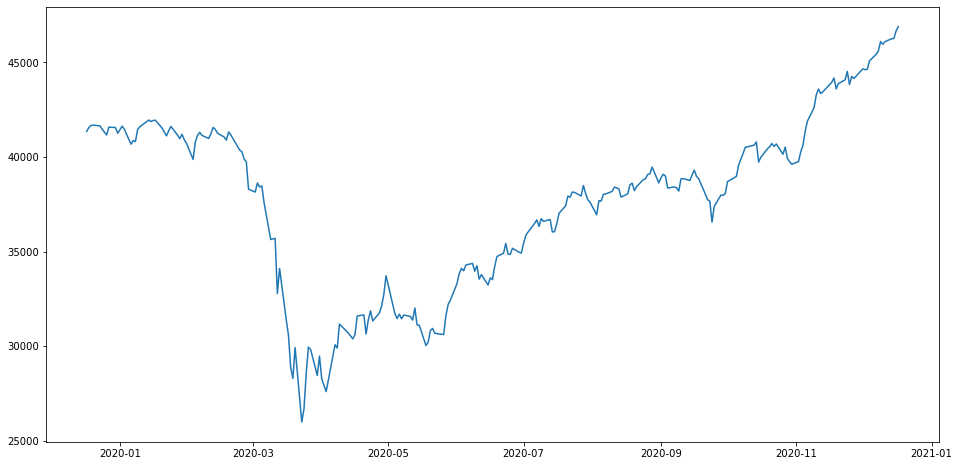

In [3]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

## Step 2 : Creating a dataframe for storing the Closing stock data per day

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [6]:
df2 = pd.read_csv('^BSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Step 3 : Data Normalization and Division into Training and Test sets

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [8]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## Step 4 : Creating a LSTM for Numerical Analysis

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
163/163 - 1s - loss: 0.0870
Epoch 2/100
163/163 - 0s - loss: 0.0104
Epoch 3/100
163/163 - 0s - loss: 0.0065
Epoch 4/100
163/163 - 0s - loss: 0.0037
Epoch 5/100
163/163 - 0s - loss: 0.0023
Epoch 6/100
163/163 - 0s - loss: 0.0020
Epoch 7/100
163/163 - 0s - loss: 0.0020
Epoch 8/100
163/163 - 0s - loss: 0.0019
Epoch 9/100
163/163 - 0s - loss: 0.0019
Epoch 10/100
163/163 - 0s - loss: 0.0019
Epoch 11/100
163/163 - 0s - loss: 0.0019
Epoch 12/100
163/163 - 0s - loss: 0.0019
Epoch 13/100
163/163 - 0s - loss: 0.0019
Epoch 14/100
163/163 - 0s - loss: 0.0020
Epoch 15/100
163/163 - 0s - loss: 0.0020
Epoch 16/100
163/163 - 0s - loss: 0.0019
Epoch 17/100
163/163 - 0s - loss: 0.0019
Epoch 18/100
163/163 - 0s - loss: 0.0020
Epoch 19/100
163/163 - 0s - loss: 0.0019
Epoch 20/100
163/163 - 0s - loss: 0.0019
Epoch 21/100
163/163 - 0s - loss: 0.0020
Epoch 22/100
163/163 - 0s - loss: 0.0019
Epoch 23/100
163/163 - 0s - loss: 0.0019
Epoch 24/100
163/163 - 0s - loss: 0.0018
Epoch 25/100
163/163 - 0s

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

## Step 5 : Making Predictions

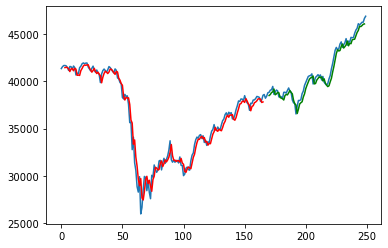

In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [12]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")



Root mean square error =  750.9092929734795  RMSE
Root mean square error =  521.8286003284053  RMSE


# Step 6 : Creating a Hybrid model for Numerical and textual Analysis

In [13]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names = columns)
news

C:\Users\moury\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


## Step 7 : Text preprocessing

In [14]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [15]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


In [16]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,Date,News
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...


In [17]:
news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7258    #BigInterview! Dhritiman Chatterjee: Nobody da...
7259    Horoscope Today; 28 December 2020: Check astro...
7260    Man recovers charred remains of 'thief' from h...
7261    Numerology Readings 30 December 2020: Predicti...
7262    Horoscope Today; 31 December 2020: Check astro...
Name: News, Length: 7263, dtype: object

## Step 8 : Adding subjectivity and polarity Scores

In [18]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [19]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

<ipython-input-19-7b7b2e13790f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Subjectivity'] = news['News'].apply(getSubjectivity)
<ipython-input-19-7b7b2e13790f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Polarity'] = news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


## Step 9 : Visualizing the polarity and Subjectivity scores

<AxesSubplot:>

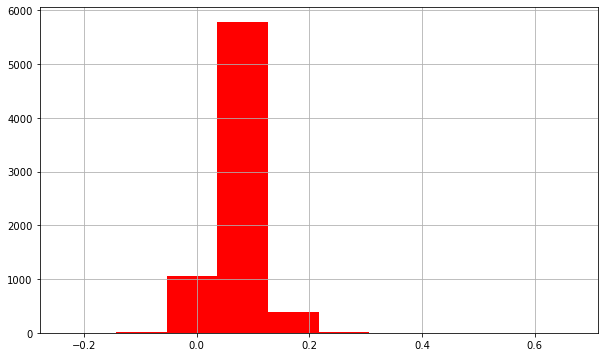

In [20]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

<AxesSubplot:>

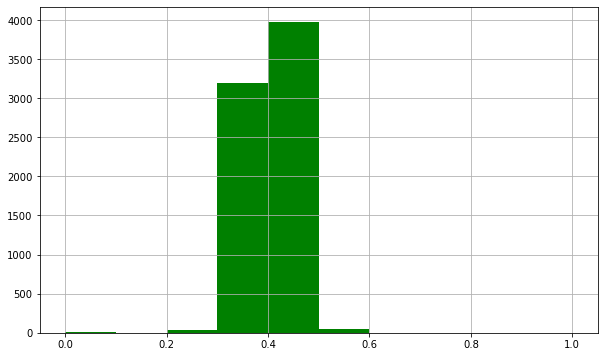

In [21]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')

## Step 10 : Performing Sentiment Analysis over the news Headlines

In [22]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

<ipython-input-22-260287d3069f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
<ipython-input-22-260287d3069f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
<ipython-input-22-260287d3069f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


## Step 11 : Merging the numerical and textual data

In [23]:
merge = news
merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [24]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
7258,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7259,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7260,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7261,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.00945,0.274775,0.807,0.116776
1,0.407692,0.357550,0.36800,0.274775,0.766,0.182566
2,0.446847,0.356994,0.93690,0.225225,0.797,0.169408
3,0.476612,0.550397,0.98845,0.279279,0.719,0.258224
4,0.439394,0.535354,0.28925,0.342342,0.704,0.235197


In [30]:
X = new_df[0:250]
y =df['Close']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(200, 6)

In [32]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
71,0.410909,0.388328,0.85655,0.180180,0.833,0.143092
160,0.340023,0.242115,0.00090,0.337838,0.774,0.125000
180,0.421230,0.376940,0.00200,0.335586,0.738,0.185855
75,0.415278,0.196759,0.03055,0.265766,0.828,0.090461
59,0.493362,0.476381,0.08270,0.376126,0.705,0.210526
101,0.424206,0.369048,0.09630,0.297297,0.758,0.182566
229,0.383692,0.296192,0.00030,0.344595,0.753,0.154605
18,0.410714,0.361523,0.12245,0.297297,0.744,0.203947
188,0.401574,0.370227,0.00135,0.308559,0.745,0.195724
15,0.292222,0.437830,0.92240,0.299550,0.714,0.251645


## Step 12 : Training a Random Forest Regressor and Adaboost Regressor for hybrid analysis

In [33]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

## Step 13 : Determining the accuracy scores for both the  Models

In [34]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

[41641.52097689 34244.61023443 36119.17630856 33777.30853526
 40836.1501173  42078.11597678 40980.36144539 37428.65724614
 35808.08570311 40624.10808603]
Date
2020-11-11    43593.671875
2020-06-18    34208.050781
2020-05-06    31685.750000
2020-08-06    38025.449219
2020-08-03    36939.601563
2020-08-12    38369.628906
2020-10-05    38973.699219
2020-04-22    31379.550781
2020-03-19    28288.230469
2020-08-04    37687.910156
Name: Close, dtype: float64
Root mean square error =  4168.794803526352  RMSE


In [35]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [36]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

Root mean square error =  3903.0531754206927  RMSE
